In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns


import pickle
from joblib import dump, load
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 500)

In [20]:
dataset = pd.read_csv("cleaned_dataset_v2.csv")

In [18]:
new_df = dataset[:20000]
tag_list = ['c#', 'java', 'asp.net', 'c++', 'javascript', 'php', 'python', 'git', 'sql']

In [22]:
git_data = dataset[dataset['tag']=='git'][:150]

In [25]:
final_dataset = pd.concat([git_data, new_df[new_df['tag'].isin(tag_list)]], ignore_index=True)

In [27]:
final_dataset.head()

,id,title,tag
0,52950,make git ignore changes case,git
1,53290,could get svnonly host pull git repository,git
2,98400,examine configuration remote git repository,git
3,156120,source code management strategies branching,git
4,171550,find remote branch local branch tracking,git


In [28]:
final_dataset['tag'].value_counts()

c#            862
java          497
asp.net       457
c++           374
javascript    317
php           274
python        261
sql           240
git           166
Name: tag, dtype: int64

In [30]:
unique_tags = list(set(final_dataset.tag.dropna().to_list()))

with open("/home/aditya_bagad2/unique_tags", "wb") as fp:
    pickle.dump(unique_tags, fp)

with open("/home/aditya_bagad2/unique_tags", "rb") as fp:
    b = pickle.load(fp)

unique_tags_dict = {i:b[i] for i in range(len(b))}

with open("/home/aditya_bagad2/unique_tags_dict", "wb") as fp:
    pickle.dump(unique_tags_dict, fp)

with open("/home/aditya_bagad2/unique_tags_dict", "rb") as fp:
    unique_tags_dict = pickle.load(fp)

# list(unique_tags_dict.items())[:10]

inv_map = {v: k for k, v in unique_tags_dict.items()}

list(inv_map.items())[:10]

[('mail-gem', 0),
 ('syncfx', 1),
 ('closest-points', 2),
 ('linearlayoutmanager', 3),
 ('rubber', 4),
 ('jsch', 5),
 ('epplus', 6),
 ('type-coercion', 7),
 ('epoch.js', 8),
 ('url-masking', 9)]

In [32]:
# Id Mapping
final_dataset['tag_id'] = final_dataset['tag'].map(lambda x: inv_map[x])

In [34]:
final_dataset.head()

,id,title,tag,tag_id
0,52950,make git ignore changes case,git,9303
1,53290,could get svnonly host pull git repository,git,9303
2,98400,examine configuration remote git repository,git,9303
3,156120,source code management strategies branching,git,9303
4,171550,find remote branch local branch tracking,git,9303


In [35]:
final_dataset.tag_id.value_counts()

24182    862
31382    497
810      457
8596     374
6701     317
26612    274
4074     261
27974    240
9303     166
Name: tag_id, dtype: int64

In [37]:
# Training Labels
X1 = final_dataset['title']

# Create Object for Tf-Idf Vectorizer Object
vectorizer_X1 = TfidfVectorizer(analyzer = 'word')

# Create TF-Idf Vectorizer
X1_tfidf = vectorizer_X1.fit_transform(X1)

In [38]:
dump(vectorizer_X1, 'title_vocab_v4.joblib')

['title_vocab_v4.joblib']

In [39]:
# Target
y = final_dataset['tag_id']

In [40]:
X1_tfidf.shape, y.shape

((3448, 4237), (3448,))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X1_tfidf, y, test_size = 0.2, random_state = 0)

In [42]:
log_reg = LogisticRegression()

In [43]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred = log_reg.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

0.5449275362318841

In [87]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 47,   0,   8,   0,   0,  44,   1,   0,   0],
       [  0,  34,   1,   0,   0,  28,   0,   0,   1],
       [  7,   1,  37,   0,   0,  27,   0,   1,   1],
       [  0,   1,   0,  12,   0,  62,   0,   0,   3],
       [  0,   0,   0,   0,  23,   6,   0,   0,   0],
       [  7,   0,   2,   6,   0, 128,   1,   6,   1],
       [  0,   0,   1,   1,   0,  28,  20,   1,   2],
       [  0,   0,   0,   0,   0,  19,   0,  21,   1],
       [  0,   0,   0,   2,   0,  43,   0,   1,  54]], dtype=int64)

In [47]:
dump(log_reg, 'LogisticRegression_v2.joblib')

['LogisticRegression_v2.joblib']

In [48]:
from sklearn.metrics import plot_confusion_matrix

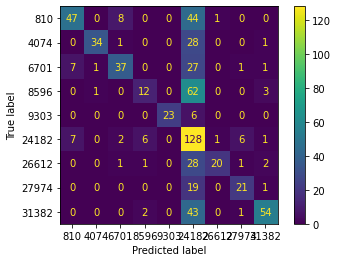

In [52]:
import matplotlib.pyplot as plt
plot_confusion_matrix(log_reg, X_test, y_test)

In [72]:
tag_id_cf = [810, 4074, 6701, 8596, 9303, 24182, 26612, 27974, 31382]
labels_cf= [unique_tags_dict[i] for i in tag_id_cf]
labels_cf

['asp.net', 'python', 'javascript', 'c++', 'git', 'c#', 'php', 'sql', 'java']

[Text(0, 0.5, 'java'),
 Text(0, 1.5, 'sql'),
 Text(0, 2.5, 'php'),
 Text(0, 3.5, 'c#'),
 Text(0, 4.5, 'git'),
 Text(0, 5.5, 'c++'),
 Text(0, 6.5, 'javascript'),
 Text(0, 7.5, 'python'),
 Text(0, 8.5, 'asp.net')]

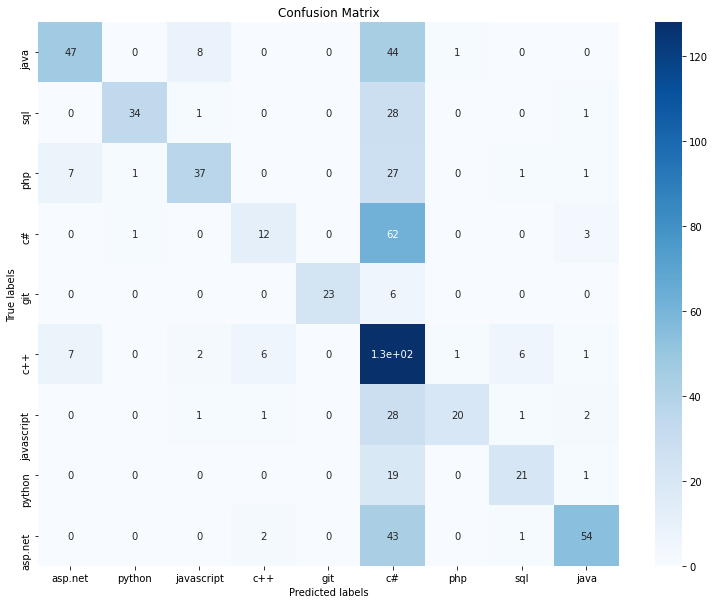

In [86]:
asd, ax= plt.subplots(figsize=(13, 10))
sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(labels_cf)
ax.yaxis.set_ticklabels(labels_cf[::-1])

In [88]:
from sklearn.metrics import precision_recall_fscore_support as score

In [91]:
precision, recall, fscore, support = score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {fscore}')
print(f'Support: {support}')

Precision: [0.7704918  0.94444444 0.75510204 0.57142857 1.         0.33246753
 0.90909091 0.7        0.85714286]
Recall: [0.47       0.53125    0.5        0.15384615 0.79310345 0.84768212
 0.37735849 0.51219512 0.54      ]
F1-Score: [0.58385093 0.68       0.60162602 0.24242424 0.88461538 0.47761194
 0.53333333 0.5915493  0.66257669]
Support: [100  64  74  78  29 151  53  41 100]
